In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import corenlp
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import cmudict
prondict = cmudict.dict()
# import nltk
# nltk.download('cmudict')
from nltk.corpus import cmudict
prondict = cmudict.dict()
import textstat
import numpy as np
from readcalc import readcalc


In [71]:
input_data_unanswered = pd.read_csv('/home/vignesh/Downloads/QueryResultsUnanswered.csv')

In [2]:
input_data = pd.read_csv('/home/vignesh/Downloads/QueryResults(3).csv')

In [3]:
input_data[0:1]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ParentId.1,first_response,date_diff,hr_diff,relatedCounts
0,48126859,1,NaN,NaN,2018-01-06 11:27:23,NaN,0,442,<p>I want to try to use python to connect to M...,7815532.0,...,1,0,NaN,NaN,NaN,48126859,2018-12-17 08:03:07,345,8277,1


In [4]:
input_data['Tags'][0:100]

0                                       <python><mysql>
1                     <python><snmp><pysnmp><snmp-trap>
2                        <python><graph><slider><bokeh>
3                    <python><search><imap><imapclient>
4                                     <python><imaplib>
5            <python><jupyter-notebook><torch><pytorch>
6                                    <python><ssh><pip>
7                         <python><tensorflow><dataset>
8                                      <python><django>
9                             <python><logging><pytest>
10                                 <python><matplotlib>
11             <python><selenium><firefox><geckodriver>
12                                       <python><jira>
13               <python><pycharm><packages><traceback>
14                          <python><linux><python-2.7>
15    <python><python-3.x><drop-down-menu><widget><j...
16                                     <python><pandas>
17                        <python><html><beautif

In [5]:
input_data.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ParentId.1', 'first_response', 'date_diff', 'hr_diff',
       'relatedCounts'],
      dtype='object')

In [6]:
print(input_data['Body'][0:2])

0    <p>I want to try to use python to connect to M...
1    <p>I received an SNMP trap message in Python3,...
Name: Body, dtype: object


In [7]:
def numsyllables(word):
  try:
    numsyllables_pronlist = lambda l: len([s for s in l if str(s.encode('ascii', 'ignore').lower()[-1]).isdigit()])
    return list(set(map(numsyllables_pronlist, prondict[word.lower()])))
  except KeyError:
    return [0]

def word_tokenize1(text):
    words = word_tokenize(text)
    words_ret = []
    for w in words:
        if not (len(w)==1 and (not w.isalpha())):
            words_ret.append(w)
#     print(words_ret)
    return words_ret

def text_statistics(text):
  not_punctuation = lambda w: not (len(w)==1 and (not w.isalpha()))
  get_word_count = lambda text: len(list(filter(not_punctuation, word_tokenize(text))))
  get_sent_count = lambda text: len(sent_tokenize(text))  
  word_count = get_word_count(text)
  sent_count = get_sent_count(text)
  syllable_count = sum(map(lambda w: max(numsyllables(w)), word_tokenize(text)))
  return word_count, sent_count, syllable_count

def fleschreading(text):
    flesch_formula = lambda word_count, sent_count, syllable_count : 206.835 - (1.015*(word_count/sent_count)) - (84.6*(syllable_count/word_count))
    word_count, sent_count, syllable_count = text_statistics(text)
#     if word_count<1 or sent_count<1:
#         print(text)
#     print(text,"  ",sent_count," ",word_count)
    if sent_count>0 and word_count>0:
        flesch = flesch_formula(word_count, sent_count, syllable_count)
        if flesch<0.0:
            print(text," ",word_count," ",sent_count," ",syllable_count)
        return flesch
    else: return 0.0
#     not_punctuation = lambda w: not (len(w)==1 and (not w.isalpha()))
#     get_word_count = lambda text: len(filter(not_punctuation, word_tokenize(text)))
#     get_sent_count = lambda text: len(sent_tokenize(text))
#     numsyllables_pronlist = lambda l: len(filter(lambda s: isdigit(s.encode('ascii', 'ignore').lower()[-1]), l))




In [8]:
fleschreading("this is good")

this is good   3   1   8


-21.809999999999945

In [9]:
textstat.flesch_reading_ease("this is good")

119.19

In [60]:
number_of_code_tags = []
lines_of_code = []
lines_without_code = []
tags_count = []
flesch_reading_ease = []
flesch_reading_textstat = []
coleman_liau_index_textstat = []
gunning_fog_index_textstat = []
words_count = []
text_without_code_1 = []
coleman_index_readcalc = []
for index,i in input_data.iterrows():
    text_without_code = ""
    tags_str = i.Tags
    soup = BeautifulSoup(i.Body, 'html.parser')
    code = soup.findAll('code')
    paragraph = soup.findAll('p')
    tags_split = len(tags_str.split('><'))
    counter = 0
    paracounter = 0
    for c in code:
        try:
            counter += len(re.findall("\n", c.string))
        except:
            pass
    word_count = 0    
    for c in paragraph:
        try:
            text_without_code += c.string
#             paracounter += len(re.findall("\n", c.string))
            paracounter += len(sent_tokenize(c.string))
            word_count += len(word_tokenize(c.string))
        except:
            pass
    words_count.append(word_count)
    text_without_code = text_without_code.replace("\n"," ").strip()
#     flesch_reading_textstat.append(textstat.flesch_reading_ease(text_without_code))
#     flesch_reading_ease.append(fleschreading(text_without_code))
#     print(text_without_code)
    coleman_liau_index_textstat.append(textstat.coleman_liau_index(text_without_code))
    gunning_fog_index_textstat.append(textstat.gunning_fog(text_without_code))
    text_without_code_1.append(text_without_code)
    coleman_index_readcalc.append(readcalc.ReadCalc(text_without_code).get_coleman_liau_index())
    lines_of_code.append(counter)
    lines_without_code.append(paracounter)
    number_of_code_tags.append(len(code))
    tags_count.append(tags_split)

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 576
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 430
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 156
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 85
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 777
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 299
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 284
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 427
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 229
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 47
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 23
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 956
TEXT

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1867
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 276
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 149
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 33
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 392
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 306
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 325
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 239
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 635
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 333
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 502
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 274
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 96


TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 596
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 416
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 350
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 264
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 210
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 344
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 118
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 515
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 312
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 118
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 445
TEX

type(text) == <class 'str'> ; Size Text: 99
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 352
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 229
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 594
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 273
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 374
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 202
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 136
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 546
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 643
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 884
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 669
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 44
TEXT IS NOT BEING PRE PROCESSED
t

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 978
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 498
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 371
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 720
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 12
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 721
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 418
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 329
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 505
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1372
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 57
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 347
TE

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 864
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 552
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 440
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 307
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 373
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 296
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 81
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 760
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 205
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 290
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 10
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 26
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 340
TE

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 283
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 322
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 432
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 378
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 28
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 279
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 447
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 672
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 268
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 284
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 406
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1076
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 589

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1083
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 353
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 99
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1303
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 70
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 648
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 215
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 173
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 365
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 478
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 699
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEX

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 112
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 537
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 404
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 100
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 707
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 492
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 320
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 170
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 300
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 251
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1384
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 350


type(text) == <class 'str'> ; Size Text: 104
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 482
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 72
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 89
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 421
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 979
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 951
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 46
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 83
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 229
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 130
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 124
TEXT IS NOT BEING PRE PROCESSED
type(

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 311
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 90
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 159
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 138
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 221
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 16
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 27
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 428
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 286
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 90
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 314
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 130
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 109
TEX

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 310
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 132
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 248
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 351
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 146
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 454
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 364
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 656
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 643
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 176
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1429
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 213


type(text) == <class 'str'> ; Size Text: 395
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 254
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 101
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 39
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 68
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 186
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 158
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 387
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 187
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 103
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 257
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 531
TEXT IS NOT BEING PRE PROCESSED
typ

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 427
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 386
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 209
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 728
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 302
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 207
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 73
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 113
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 31
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 160
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 242
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 952
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 686
T

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 291
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 351
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 683
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 148
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 554
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 626
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 444
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 291
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 32
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 346
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 18
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 131
TEX

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 1141
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 237
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 24
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 223
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 111
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 778
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 405
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 122
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 140
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 0
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 326
TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 219
TEX

In [73]:
words_count

[128,
 51,
 35,
 21,
 147,
 59,
 50,
 94,
 44,
 8,
 0,
 5,
 193,
 55,
 98,
 47,
 92,
 0,
 211,
 35,
 47,
 38,
 20,
 33,
 40,
 50,
 128,
 36,
 102,
 21,
 53,
 18,
 0,
 55,
 12,
 68,
 59,
 63,
 51,
 59,
 63,
 72,
 19,
 261,
 111,
 121,
 109,
 36,
 132,
 244,
 57,
 80,
 57,
 104,
 3,
 62,
 54,
 8,
 54,
 115,
 44,
 0,
 30,
 113,
 72,
 44,
 97,
 29,
 66,
 23,
 99,
 118,
 50,
 0,
 28,
 71,
 66,
 21,
 12,
 94,
 43,
 22,
 62,
 0,
 326,
 0,
 51,
 336,
 17,
 28,
 115,
 70,
 12,
 44,
 0,
 70,
 66,
 76,
 93,
 101,
 48,
 36,
 48,
 176,
 186,
 15,
 66,
 38,
 371,
 57,
 32,
 9,
 81,
 65,
 62,
 53,
 137,
 81,
 93,
 32,
 25,
 25,
 70,
 8,
 50,
 8,
 32,
 67,
 377,
 501,
 111,
 81,
 57,
 128,
 104,
 49,
 68,
 0,
 29,
 187,
 258,
 73,
 41,
 130,
 40,
 30,
 41,
 110,
 40,
 106,
 21,
 74,
 81,
 99,
 131,
 18,
 41,
 52,
 135,
 90,
 73,
 202,
 41,
 79,
 46,
 118,
 87,
 84,
 64,
 94,
 221,
 24,
 65,
 6,
 10,
 175,
 0,
 0,
 22,
 74,
 46,
 83,
 150,
 136,
 7,
 98,
 74,
 42,
 524,
 43,
 81,
 108,
 146,
 68,
 58,


TypeError: '<' not supported between instances of 'ReadCalc' and 'float'

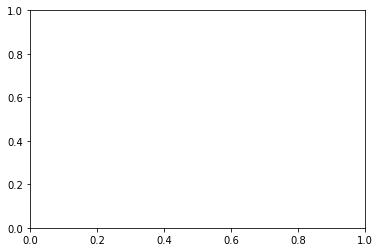

In [42]:
plt.hist(gunning_fog_index_readcalc)

In [32]:
text_without_code_1[0]

'I want to try to use python to connect to MySQL database.Connecting to localhost works fine but I can not connect to MySQL database via ip address.Here is my code:The error is like this:OperationalError: (2003, "Can\'t connect to MySQL server on \'My   Computer IP\' (111)")I have tried this method but it still doesn\'t work.I don\'t have the line skip-networking in the document "my.cnf" originally.So basically, mysql should not listen only 127.0.0.1.  In theory, mysql can listen any IP and I also set the port 3306 to be allowed in my computer.Does anyone has some suggestion?'

In [61]:
from readcalc import readcalc

str1 = "I want to try to use python to connect to MySQL database.Connecting to localhost works fine but I can not connect to MySQL database via ip address.Here is my code:The error is like this:OperationalError: (2003, Cant connect to MySQL server on My   Computer IP (111))I have tried this method but it still doesnt work.I dont have the line skip-networking in the document originally.So basically, mysql should not listen only 127.0.0.1.  In theory, mysql can listen any IP and I also set the port 3306 to be allowed in my computer.Does anyone has some suggestion?"
calc = readcalc.ReadCalc(str1)

print(calc.get_coleman_liau_index())

str1

TEXT IS NOT BEING PRE PROCESSED
type(text) == <class 'str'> ; Size Text: 560
10.481134020618555


'I want to try to use python to connect to MySQL database.Connecting to localhost works fine but I can not connect to MySQL database via ip address.Here is my code:The error is like this:OperationalError: (2003, Cant connect to MySQL server on My   Computer IP (111))I have tried this method but it still doesnt work.I dont have the line skip-networking in the document originally.So basically, mysql should not listen only 127.0.0.1.  In theory, mysql can listen any IP and I also set the port 3306 to be allowed in my computer.Does anyone has some suggestion?'

In [33]:
textstat.gunning_fog(text_without_code_1[0])

43.89

In [41]:
words_count[0:100][word_count<100]

51

(array([2.418e+03, 6.550e+02, 1.150e+02, 1.900e+01, 7.000e+00, 5.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.,  92., 184., 276., 368., 460., 552., 644., 736., 828., 920.]),
 <a list of 10 Patch objects>)

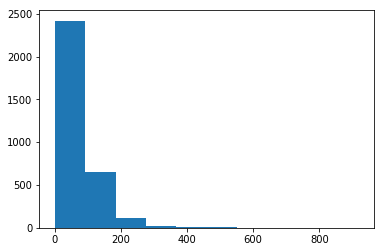

In [33]:
# words_count = np.array(words_count)
# words_count = words_count[words_count<1000]
# plt.hist(words_count)

In [30]:
print(input_data['Body'][0:1])

0    <p>I want to try to use python to connect to M...
Name: Body, dtype: object


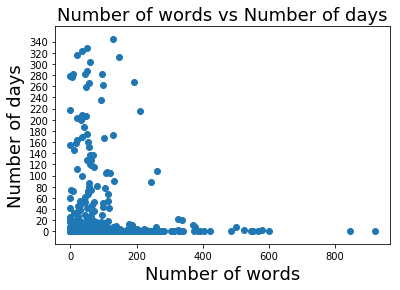

In [18]:
input_data['words_count'] = words_count
input_data_within_1000 = input_data[input_data['words_count']<1000]
plt.title("Number of words vs Number of days",fontsize=18)
plt.xlabel("Number of words",fontsize=18)
plt.ylabel("Number of days",fontsize=18)
plt.yticks(np.arange(0, 350, 20))
# plt.figure(figsize=(20,20))

plt.scatter(input_data_within_1000['words_count'],input_data_within_1000['date_diff'])

(array([   3.,  224.,   23., 2095.,  834.,   32.,    9.,    3.,    0.,
           3.]),
 array([-39.61 , -27.239, -14.868,  -2.497,   9.874,  22.245,  34.616,
         46.987,  59.358,  71.729,  84.1  ]),
 <a list of 10 Patch objects>)

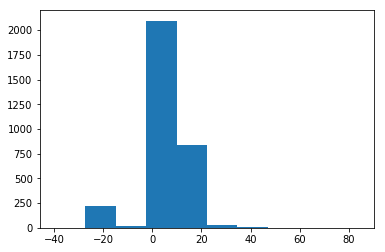

In [126]:
plt.hist(coleman_liau_index_textstat)

(array([3.034e+03, 1.760e+02, 1.000e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.   ,  33.966,  67.932, 101.898, 135.864, 169.83 , 203.796,
        237.762, 271.728, 305.694, 339.66 ]),
 <a list of 10 Patch objects>)

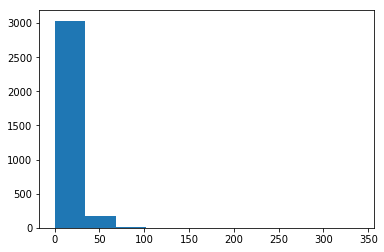

In [19]:
plt.hist(gunning_fog_index_textstat)

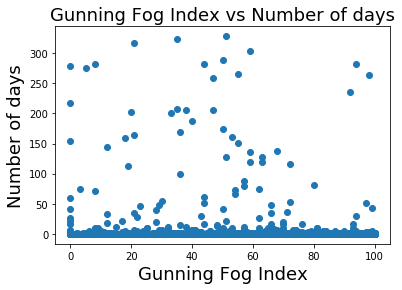

In [27]:
input_data['gunning_fog_index'] = words_count
input_data_within_50 = input_data[input_data['gunning_fog_index']<=100]
plt.title("Gunning Fog Index vs Number of days",fontsize=18)
plt.xlabel("Gunning Fog Index",fontsize=18)
plt.ylabel("Number of days",fontsize=18)
# plt.yticks(np.arange(0, 350, 20))

plt.scatter(input_data_within_50['gunning_fog_index'],input_data_within_50['date_diff'])

/home/vignesh/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vignesh/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


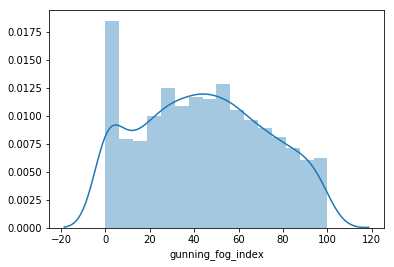

In [28]:
import seaborn as sns
sns.distplot(input_data_within_50['gunning_fog_index'])

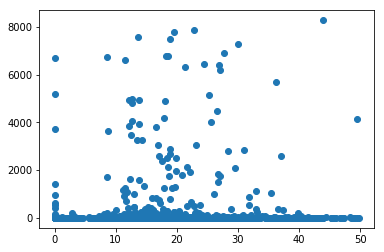

In [131]:
input_data['gunning_fog_index'] = gunning_fog_index_textstat
input_data_within_50 = input_data[input_data['gunning_fog_index']<=50]
plt.scatter(input_data_within_50['gunning_fog_index'],input_data_within_50['hr_diff'])

(array([277., 209., 842., 910., 474., 219., 107.,  72.,  51.,  18.]),
 array([ 0.   ,  4.981,  9.962, 14.943, 19.924, 24.905, 29.886, 34.867,
        39.848, 44.829, 49.81 ]),
 <a list of 10 Patch objects>)

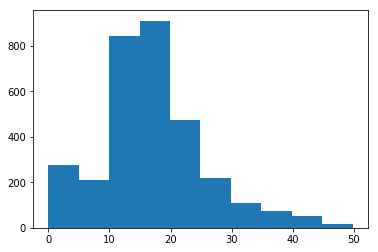

In [132]:
plt.hist(input_data_within_50.gunning_fog_index)

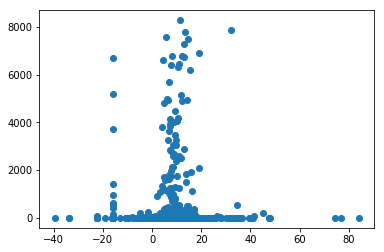

In [127]:
plt.scatter(coleman_liau_index_textstat,input_data['hr_diff'])

(array([2.935e+03, 2.190e+02, 4.200e+01, 1.200e+01, 1.100e+01, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  54.1, 108.2, 162.3, 216.4, 270.5, 324.6, 378.7, 432.8,
        486.9, 541. ]),
 <a list of 10 Patch objects>)

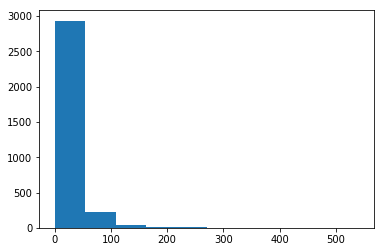

In [62]:
plt.hist(lines_of_code)

(array([8.211e+03, 8.150e+02, 1.700e+02, 4.000e+01, 1.800e+01, 6.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <a list of 10 Patch objects>)

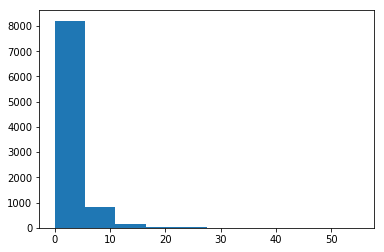

In [8]:
plt.hist(number_of_code_tags)

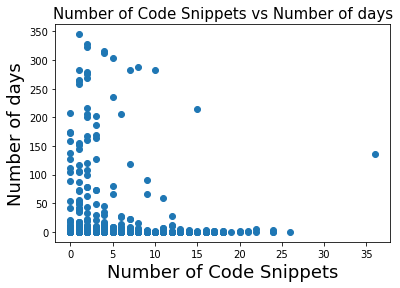

In [70]:
plt.title("Number of Code Snippets vs Number of days",fontsize=15)
plt.xlabel("Number of Code Snippets",fontsize=18)
plt.ylabel("Number of days",fontsize=18)
plt.scatter(number_of_code_tags,input_data['date_diff'])

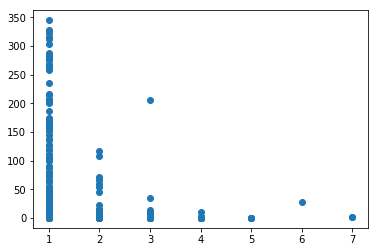

In [8]:
plt.scatter(input_data['relatedCounts'],input_data['hr_diff'])

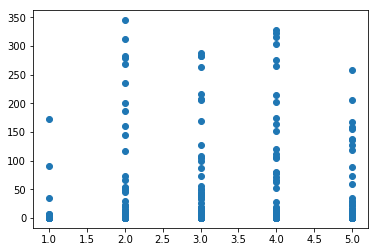

In [63]:
plt.scatter(tags_count,input_data['date_diff'])

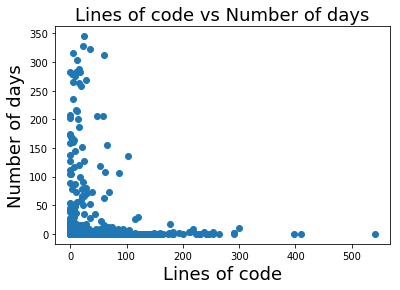

In [65]:
plt.title("Lines of code vs Number of days",fontsize=18)
plt.xlabel("Lines of code",fontsize=18)
plt.ylabel("Number of days",fontsize=18)
plt.scatter(lines_of_code,input_data['date_diff'])

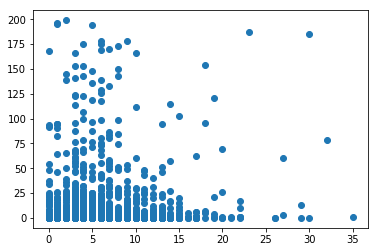

In [144]:
# input_data_within_20 = input_data[input_data['hr_diff']<=5]
input_data['lines_without_code'] = lines_without_code
input_data1 = input_data[input_data['hr_diff']<=200]
# input_data_filter_within_20 = input_data[input_data['lines_without_code']<=20]
plt.scatter(input_data1['lines_without_code'],input_data1['hr_diff'])

In [141]:
# input_data_within_20 = input_data[input_data['hr_diff']<=5]
input_data['lines_without_code'] = lines_without_code
input_data_filter_within_0 = input_data[input_data['lines_without_code']==0]
# plt.scatter(input_data_filter_within_20['lines_without_code'],input_data_filter_within_20['hr_diff'])
input_data_filter_within_0

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,FavoriteCount,ClosedDate,CommunityOwnedDate,ParentId.1,first_response,date_diff,hr_diff,relatedCounts,gunning_fog_index,lines_without_code
1,48275237,1,NaN,NaN,2018-01-16 06:29:19,NaN,0,2940,"<p>I received an SNMP trap message in Python3,...",4109962.0,...,NaN,NaN,NaN,48275237,2018-12-10 12:08:20,328,7878,1,22.78,0
2,48397330,1,NaN,NaN,2018-01-23 08:38:42,NaN,0,264,"<p>I already have a slider code from <a href=""...",8170983.0,...,NaN,NaN,NaN,48397330,2018-12-12 21:56:39,323,7765,1,19.60,0
3,48303136,1,53545312.0,NaN,2018-01-17 14:11:43,NaN,1,379,<p>I am using Python's <code>imapclient</code>...,2221281.0,...,NaN,NaN,NaN,48303136,2018-11-29 18:21:22,316,7588,1,13.67,0
4,48445618,1,NaN,NaN,2018-01-25 14:47:22,NaN,0,622,<p>There's an email blasted out every morning ...,8502642.0,...,NaN,NaN,NaN,48445618,2018-12-03 12:12:16,312,7486,1,18.90,0
5,48316706,1,NaN,NaN,2018-01-18 08:22:56,NaN,2,1451,<p>I installed pytorch using conda command whe...,8703540.0,...,1.0,NaN,NaN,48316706,2018-11-18 03:17:20,304,7291,1,30.03,0
6,48343669,1,53135936.0,NaN,2018-01-19 14:48:48,NaN,4,730,<p>I am controlling a remote unit over SSH and...,4106261.0,...,NaN,NaN,NaN,48343669,2018-11-03 22:08:50,288,6920,1,27.77,0
7,48351883,1,NaN,NaN,2018-01-20 01:54:38,NaN,3,414,"<p><a href=""https://i.stack.imgur.com/oyDNI.pn...",3534028.0,...,2.0,NaN,NaN,48351883,2018-10-29 21:23:37,282,6788,1,18.59,0
8,48312057,1,53017626.0,NaN,2018-01-18 00:19:57,NaN,5,180,"<p>Hello fellow programmers, </p>\n\n<p>I woul...",8957548.0,...,1.0,NaN,NaN,48312057,2018-10-27 00:00:11,282,6768,1,18.31,0
9,48190020,1,NaN,NaN,2018-01-10 14:50:52,NaN,2,426,"<p>I've seen this question: <a href=""https://s...",5691066.0,...,0.0,NaN,NaN,48190020,2018-10-19 00:55:39,282,6754,1,8.51,0
10,48509766,1,NaN,NaN,2018-01-29 20:52:05,NaN,0,1740,<p>I have a python program and am trying to pl...,4862280.0,...,NaN,NaN,NaN,48509766,2018-11-04 16:40:12,279,6692,1,0.00,0


(array([1558.,    0.,  707.,    0.,  169.,    0.,  105.,    0.,   51.,
          45.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

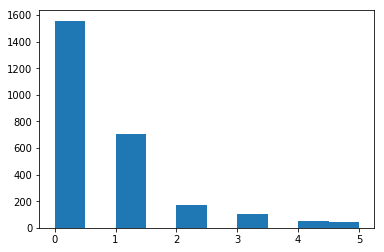

In [17]:
input_data_within_50 = input_data[input_data['hr_diff']<=5]
plt.hist(input_data_within_50['hr_diff'])

# input_data_within_10 = input_data[input_data['number_of_days']<=10]

(array([7199., 1101.,  250.,  170.,  100.,   72.,   60.,   53.,   29.,
          63.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

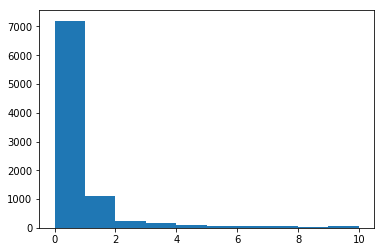

In [12]:
plt.hist(input_data_within_10['number_of_days'])

In [18]:
text = "Chris wrote a simple sentence that he parsed with Stanford CoreNLP. How are you?"

# We assume that you've downloaded Stanford CoreNLP and defined an environment
# variable $CORENLP_HOME that points to the unzipped directory.
# The code below will launch StanfordCoreNLPServer in the background
# and communicate with the server to annotate the sentence.
with corenlp.CoreNLPClient(timeout=1000000,annotators="ssplit") as client:
  ann = client.annotate(text)
  print(ann)


# You can access annotations using ann.
sentence = ann.sentence[0]

# The corenlp.to_text function is a helper function that
# reconstructs a sentence from tokens.
assert corenlp.to_text(sentence) == text

# You can access any property within a sentence.
# print(sentence.text)


text: "Chris wrote a simple sentence that he parsed with Stanford CoreNLP. How are you?"
sentence {
  token {
    word: "Chris"
    value: "Chris"
    before: ""
    after: " "
    originalText: "Chris"
    beginChar: 0
    endChar: 5
    tokenBeginIndex: 0
    tokenEndIndex: 1
    hasXmlContext: false
  }
  token {
    word: "wrote"
    value: "wrote"
    before: " "
    after: " "
    originalText: "wrote"
    beginChar: 6
    endChar: 11
    tokenBeginIndex: 1
    tokenEndIndex: 2
    hasXmlContext: false
  }
  token {
    word: "a"
    value: "a"
    before: " "
    after: " "
    originalText: "a"
    beginChar: 12
    endChar: 13
    tokenBeginIndex: 2
    tokenEndIndex: 3
    hasXmlContext: false
  }
  token {
    word: "simple"
    value: "simple"
    before: " "
    after: " "
    originalText: "simple"
    beginChar: 14
    endChar: 20
    tokenBeginIndex: 3
    tokenEndIndex: 4
    hasXmlContext: false
  }
  token {
    word: "sentence"
    value: "sentence"
    before: " "


AssertionError: 

In [13]:
import os
os.getenv("CORENLP_HOME")

'/home/vignesh/Documents/TextAnalytics/stanford-corenlp-full-2018-10-05'

In [5]:
os.environ["CORENLP_HOME"] = "/home/vignesh/Documents/TextAnalytics/stanford-corenlp-full-2018-10-05"

In [6]:
os.getenv("CORENLP_HOME")

'/home/vignesh/Documents/TextAnalytics/stanford-corenlp-full-2018-10-05'

In [30]:
len(ann.sentence)

2

In [32]:
import pyphen

In [33]:
dic = pyphen.Pyphen(lang='nl_NL')

In [41]:
dic.inserted('scala')

'sca-la'